In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
# Define parameters symbolically
t, g, m1, m2, L1, L2 = sp.symbols('t, g, m1, m2, L1, L2')

In [3]:
# Define theta 1&2 as functions of parameters
the1, the2 = sp.symbols(r'\theta_1, \theta_2', cls=sp.Function)
# Define them as specific funcions of time
the1 = the1(t)
the2 = the2(t)

In [4]:
# Define derivatives of theta
the1_d  = sp.diff(the1, t)
the2_d  = sp.diff(the2, t)
the1_dd = sp.diff(the1_d, t)
the2_dd = sp.diff(the2_d, t)

In [5]:
# Define the cartisian coordinates of the masses
x1 = L1*sp.sin(the1)
x2 = L1*sp.sin(the1) +L2*sp.sin(the2)
y1 = -L1*sp.cos(the1)
y2 = -L1*sp.cos(the1) -L2*sp.cos(the2)

In [6]:
# Define Kenetic energy of the system
K1 = 0.5*m1*(sp.diff(x1,t)**2+sp.diff(y1,t)**2)
K2 = 0.5*m2*(sp.diff(x2,t)**2+sp.diff(y2,t)**2)
K = K1+K2
# Define Potential energy of the system
P1 = m1*g*y1
P2 = m1*g*y2
P = P1+P2
# Define Lagrangian charachteristic of the system
L = K-P

In [7]:
# Getting Legrantian Equations
LE1 = sp.diff(L, the1) - sp.diff(sp.diff(L, the1_d), t).simplify()
LE2 = sp.diff(L, the2) - sp.diff(sp.diff(L, the2_d), t).simplify()
# Solving for the Equations when they are = 0
sols = sp.solve([LE1,LE2], (the1_dd, the2_dd), simplify=False, rational=False)

In [8]:
# Define z=the_d to linearise the expression
# Also makes the functions numerical
dz1dt_f = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d),sols[the1_dd]) #Derivative of z1 is the double derivative of theta1
dz2dt_f = sp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d),sols[the2_dd]) #Derivative of z2 is the double derivative of theta2
dthe1dt_f = sp.lambdify(the1_d, the1_d) #Derivative of theta1 is the derivative of theta1
dthe2dt_f = sp.lambdify(the2_d, the2_d) #Derivative of theta2 is the derivative of theta2

In [9]:
# Define vector S + (the1, z1, the2, z2) and use its derivative
def dSdt(S,t,g,m1,m2,L1,L2):
    the1, z1, the2, z2 = S
    return[dthe1dt_f(z1), 
           dz1dt_f(t,g,m1,m2,L1,L2,the1,the2,z1,z2),
           dthe2dt_f(z2), 
           dz2dt_f(t,g,m1,m2,L1,L2,the1,the2,z1,z2)]

In [10]:
# Solve the ODE between specific time steps
t = np.linspace(0,40,1001) #25 FPS used for animation
g = 9.81
m1 = 1
m2 = 1
L1 = 1
L2 = 1
ans = odeint(dSdt, y0=[1,-3,-1,5], t=t, args=(g,m1,m2,L1,L1)) #y0 = [the1,z1,the2,z2] at initial conditions

In [11]:
# Obtain theta 1&2 frim the answers
the1 = ans.T[0]
the2 = ans.T[2]

In [12]:
# Gets cartisian coordinates from theta 1&2
def get_x1y1x2y2(t,the1,the2,L1,L2):
    x1 = L1*np.sin(the1)
    y1 = -L1*np.cos(the1)
    x2 = L1*np.sin(the1) +L2*np.sin(the2)
    y2 = -L1*np.cos(the1) -L2*np.cos(the2)
    return(x1,y1,x2,y2)
x1,y1,x2,y2 = get_x1y1x2y2(t,ans.T[0],ans.T[2],L1,L2)

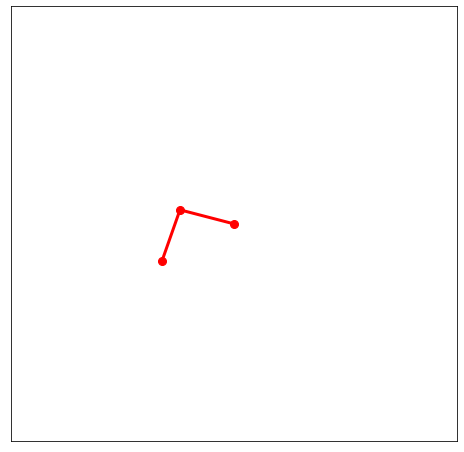

In [13]:
# Animate results
def animate(i):
    ln1.set_data([0,x1[i],x2[i]],[0,y1[i],y2[i]])

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.set_facecolor('w')
ax.get_xaxis().set_ticks([]) #Removes x axis ticks
ax.get_yaxis().set_ticks([]) #Removes y axis ticks
ln1, = plt.plot([],[],'ro-', lw=3, markersize=8)
# ln2, = ax.plot([],[],'ro', lw=3, markersize=8, alpha = 0.05, color ='cyan')
# ln3, = ax.plot([],[],'ro', lw=3, markersize=8, alpha = 0.05, color ='cyan')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow', fps=25)